# Declaration of Originality

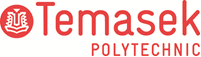

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Shawn Daniel Foo (2404904A)
* Tutorial Group                : PC03 
* Tutor						    :  Ruchir
* Submission Date               :  11 Feb 2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 1. Business Understanding
Goal: The objective of this project is to create a machine learning model that can classify whether or not a given video game would have high or low sales in the international market (≥ 1 million units) depending on other factors unrelated to sales.

This prediction will assist game developers and publishers in making a more informed decision pertaining to the planning of games and marketing strategies.

# 2. Data Understanding

## 2.1 Load dataset

In [10]:
## Read *.csv file into pandas DataFrame
FILE_PATH = "vgsales.csv"
df = pd.read_csv(FILE_PATH)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [11]:
## Check the shape of the DataFrame
df.shape


(16598, 11)

## 2.2 Summary Statistics

In [12]:
## Understand the type of variable for each column
## Inspect data types and missing values to prepare for encoding and cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [13]:
## Check for missing data
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [14]:
## Examine data distribution
df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063,0.537441
std,0.816683,0.505351,0.309291,0.188588,1.555028
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

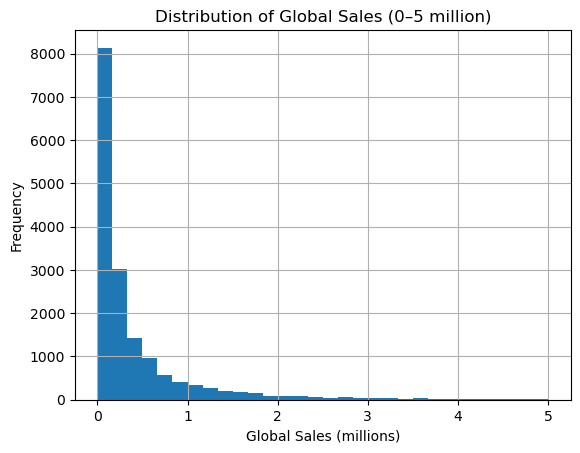

In [15]:
## Understanding distribution of target
## Visualise the distribution of the target variable Global_Sales, to understand class imbalance and skewness, which informs the need for threshold-based classification and appropriate evaluation metrics 
df["Global_Sales"].hist(bins=30, range=(0, 5))
plt.xlabel("Global Sales (millions)")
plt.ylabel("Frequency")
plt.title("Distribution of Global Sales (0–5 million)")
plt.show()

##Global Sales is highly right-skewed
##This histogram limits the range to 0–5 million units to capture the majority. no. of games, because extreme best-sellers are very rare and would otherwise dominate the visualisation

### 2.3.1.2 Understanding distribution of features

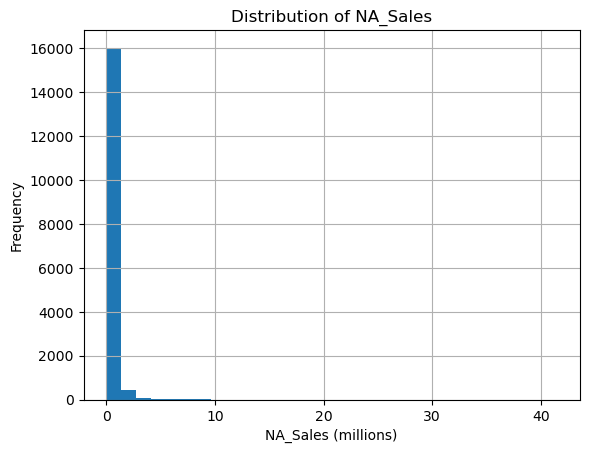

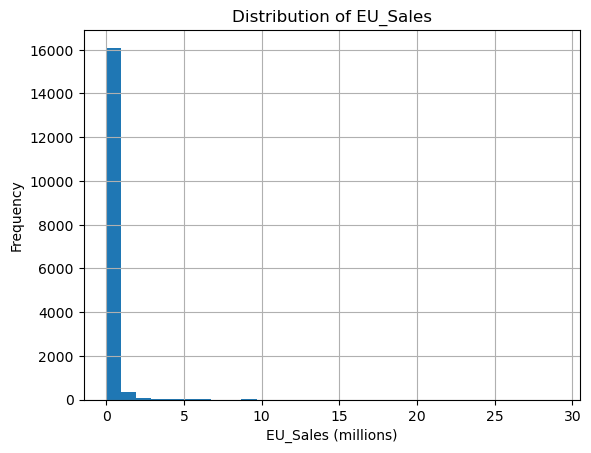

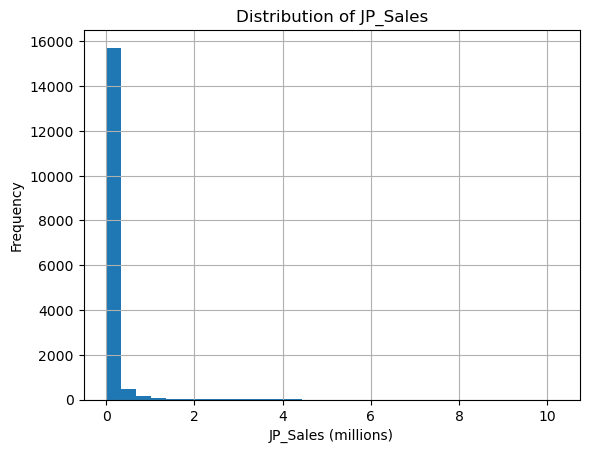

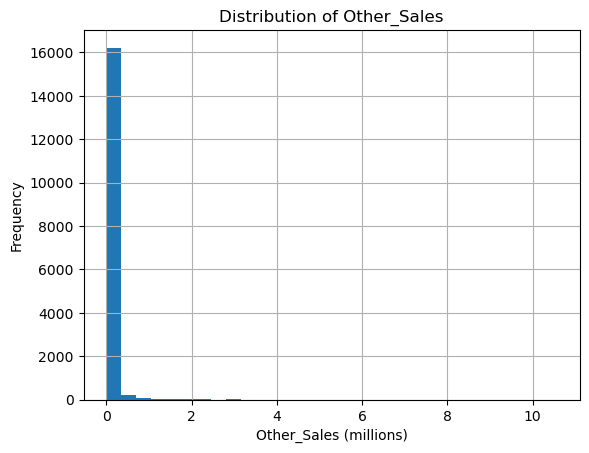

In [16]:
## Visualise the distribution of numerical input features to assess skewness, scale differences, and the need feature engineering or grouping before model training

numeric_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

for col in numeric_features:
    plt.figure()
    df[col].hist(bins=30)
    plt.xlabel(f"{col} (millions)")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()

### 2.3.2 Understanding relationship between variables

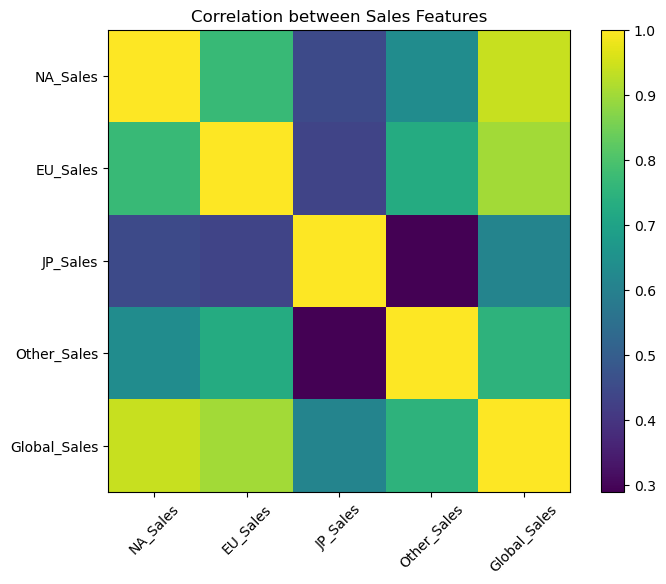

In [17]:
## Understanding the Relationship Between Variables
## In this step, we are examining how different Regional Sales figures compare with each other and Global_Sales.
## Since Global_Sales is the aggregate of all the Regional_Sales, strong correlations should be visible.
## This helps validate data consistency and identify potential multicollinearity problems,
## which is important when selecting features for model training.

sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

corr_matrix = df[sales_cols].corr()

plt.figure(figsize=(8,6))
plt.imshow(corr_matrix)
plt.colorbar()
plt.xticks(range(len(sales_cols)), sales_cols, rotation=45)
plt.yticks(range(len(sales_cols)), sales_cols)
plt.title("Correlation between Sales Features")
plt.show()

# 3. Data Preparation

## 3.1 Data Cleaning

In [18]:
## Data Cleaning: Handling Missing Values
## Re-check missing values after initial checking to confirm which features
## require treatment before model training

df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [19]:
## Fill missing Year values using the median rather than the mean
## to minimize the impact of outliers and preserve the typical
## release period
df["Year"] = df["Year"].fillna(df["Year"].median())

## Fill missing Publisher values with a placeholder category ("Unknown")
## to retain all records while allowing categorical encoding later
df["Publisher"] = df["Publisher"].fillna("Unknown")

## Verify that all missing values have been handled successfully,
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [20]:
## Create Target Column for Binary Classification
## A game is classified as 'High Sales' if Global_Sales >= 1,000,000 units.
## This threshold converts the continuous sales outcome into a business-friendly
## decision label that is easier to predict and interpret.
df["High_Sales"] = (df["Global_Sales"] >= 1).astype(int)

## Check the distribution of classes to diagnose class imbalance.
df['High_Sales'] \
    .value_counts() \
    .rename({
        0: "Low Sales (<1M) = ",
        1: "High Sales (>=1M) = "
    }) \
    .rename_axis("Sales Category")


Sales Category
Low Sales (<1M) =       14517
High Sales (>=1M) =      2081
Name: count, dtype: int64

High_Sales is defined by applying a threshold of 1 million units on Global_Sales.

This turns the problem into binary classification, making it easier to implement (predict High/Low).

The class distribution indicates that the data set is imbalanced, i.e., it has more Low Sales than High Sales, and the performance is later evaluated for the minority class, i.e., Class 1.

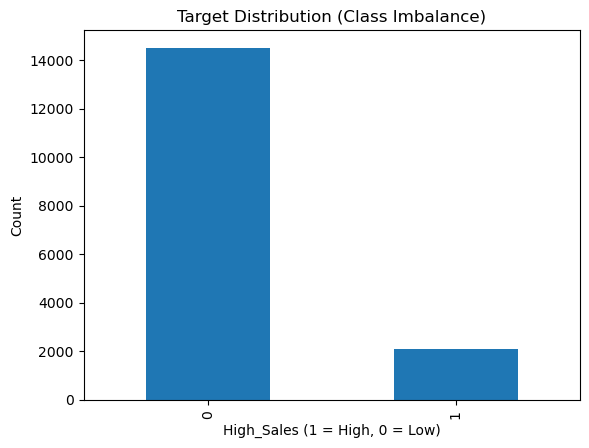

In [21]:
##Visualise class distribution
##This plot shows the imbalance between Low Sales and High Sales games.
##Which in turn helps decide the choice of algorithm

df["High_Sales"].value_counts().plot(kind="bar")
plt.xlabel("High_Sales (1 = High, 0 = Low)")
plt.ylabel("Count")
plt.title("Target Distribution (Class Imbalance)")
plt.show()

## 3.2 Train-Test Split

In [22]:
## Split data into training and testing sets
## Select features that are available before sales occur (Exclude sales-related columns to prevent data leakage)
# Features (NO Sales to avoid leakage)
features = ["Year", "Platform", "Genre", "Publisher"]

X = df[features]
y = df["High_Sales"]

## Perform stratified split to preserve class imbalance in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Apply one-hot encoding to categorical features after splitting
# to avoid information leakage from the test set
X_train = pd.get_dummies(X_train, columns=["Platform", "Genre", "Publisher"], drop_first=True)
X_test  = pd.get_dummies(X_test,  columns=["Platform", "Genre", "Publisher"], drop_first=True)

# Align train and test feature spaces to ensure consistent input dimensions
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((13278, 570), (3320, 570), (13278,), (3320,))

To ensure a fair and realistic assessment can be ensured by splitting the dataset prior to applying the encoding. This can be achieved by splitting the dataset into the training and testing sets.
Only the features available before the release (year, platform, genre, publisher) are used to avoid data leakage from the sales features.

Due to the imbalanced nature of the target variable, stratified sampling is used to maintain this balance between all sets.

In one-hot encoding, the goal is to avoid information leakage after data splitting; feature alignment ensures that the number of input data dimensions for both sets is equal. This ensures that the model will generalize well to unseen data as well as replicate real-world usage conditions.

# 4. Modelling

### 4.2 Train Model

In [23]:
## Initialise and train model

## Scale features for Logistic Regression
## Standardisation is necessary for gradient-based models to guarantee
## coefficients are learned efficiently across features of different scales.
##with_mean=False is used because one-hot encoded data is sparse.
scaler = StandardScaler(with_mean=False)   # works well with one-hot encoded data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression 
## Used as an interpretable baseline model to assess linear separability
log_reg = LogisticRegression(
    class_weight="balanced",
    max_iter=5000,
    solver="lbfgs"
)
log_reg.fit(X_train_scaled, y_train)

## Decision Tree
## Captures non-linear relationships and feature interactions
dt = DecisionTreeClassifier(
    class_weight="balanced",
    random_state=42
)
dt.fit(X_train, y_train)

## Random Forest 
## Ensemble of decision trees provides better generalization Moreover, it reduces overfitting as opposed to using a single tree.
rf = RandomForestClassifier(
    class_weight="balanced",
    random_state=42
)
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Several models of classification are trained to compare performances across increasing levels of model complexities.
Logistic Regression is used due to its interpretability and efficiency on high-dimensional data as a baseline.
Decision Trees are introduced to capture non-linear relationships, while Random Forests are used as an ensemble method to improve robustness and generalisation.

Class weights are uniformly used for all models in this paper in order to overcome the strong class imbalance issue inherent in this dataset. This step penalizes the model for predicting the minority class to ensure that during training, the predictions for high sales games are not forgotten.

# 5. Model Evaluation

The models are assessed using precision, recall, and F1-score instead of accuracy.
This is because the target variable (`High_Sales`) is highly imbalanced, meaning there are significant

more low-sales games than high-sales games.
While using accuracy alone would prove misleading, as the model would obtain high accuracy by
simply predicting the majority class. Hence, there is a need for a more informative set of metrics to assess the performance of each model in predicting well-selling games.

In [24]:
## Evaluate models using precision, recall and F1-score
## Accuracy alone is insufficient due to class imbalance

## Classification Reports (0=Low sales, 1=High sales)

## Generate predictions from each trained model
## Logistic Regression uses scaled features
## Decision Tree and Random Forest do not require feature scaling

y_pred_lr = log_reg.predict(X_test_scaled)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

## Print classification report to evaluate precision, recall and F1-score
## This helps assess how well the model identifies high-sales games

## LOGISTIC REGRESSION
print("\n================ LOGISTIC REGRESSION ================\n")
print(classification_report(y_test, y_pred_lr, digits=3))


## Generate confusion matrix to analyse prediction errors
## TN: correctly predicted low sales
## FP: predicted high sales but actually low sales
## FN: predicted low sales but actually high sales
## TP: correctly predicted high sales

cm_lr = confusion_matrix(y_test, y_pred_lr)
tn, fp, fn, tp = cm_lr.ravel()

print("Confusion Matrix (Logistic Regression)")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")


## DECISION TREE
## Decision Tree can capture non-linear relationships
## but may overfit if not evaluated carefully

print("\n================ DECISION TREE ================\n")
print(classification_report(y_test, y_pred_dt, digits=3))

cm_dt = confusion_matrix(y_test, y_pred_dt)
tn, fp, fn, tp = cm_dt.ravel()

print("Confusion Matrix (Decision Tree)")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

## RANDOM FOREST
## Random Forest reduces overfitting by averaging multiple decision trees
## This often improves generalisation performance on unseen data
print("\n================ RANDOM FOREST ================\n")
print(classification_report(y_test, y_pred_rf, digits=3))

cm_rf = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm_rf.ravel()

print("Confusion Matrix (Random Forest)")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")




================ LOGISTIC REGRESSION ================

              precision    recall  f1-score   support

           0      0.950     0.715     0.816      2904
           1      0.270     0.738     0.396       416

    accuracy                          0.718      3320
   macro avg      0.610     0.726     0.606      3320
weighted avg      0.865     0.718     0.763      3320

Confusion Matrix (Logistic Regression)
True Negatives (TN): 2076
False Positives (FP): 828
False Negatives (FN): 109
True Positives (TP): 307

================ DECISION TREE ================

              precision    recall  f1-score   support

           0      0.926     0.844     0.883      2904
           1      0.326     0.529     0.404       416

    accuracy                          0.804      3320
   macro avg      0.626     0.686     0.643      3320
weighted avg      0.851     0.804     0.823      3320

Confusion Matrix (Decision Tree)
True Negatives (TN): 2450
False Positives (FP): 454
False Negativ


“Although Logistic Regression achieved higher recall for high-sales games, it produced a large number of false positives. Random Forest was selected for its superior balance between recall and precision.”

## Iterative model development


After the initial data split, feature engineering techniques such as rare publisher grouping and one-hot encoding were introduced to combat noise, handle high-cardinality categorical variables, and help stabilize the model.
Multiple models (Logistic Regression, Decision Tree, and Random Forest) were then used for training and evaluating to assess the performance based on the aforementioned data conditions.
Evaluation metrics such as model accuracy, precision, recall, and F1 score were used to evaluate these models, which were then refined to address the problem of imbalanced classes.

In [ ]:
## Feature engineering: Publisher grouping
## This iteration of the baseline model attempts to improve upon the previous one with high cardinality
## categorical features (Publisher), which can negatively impact model performance
## When one-hot encoded directly

X = df[["Year", "Platform", "Genre", "Publisher"]]
y = df["High_Sales"]

## Split data into train and test sets

## Stratified split is used to preserve the original class imbalance
## between high and low sales in both training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## Feature engineering 
## Copies are created to avoid modifying the original split data
## and to prevent unintended side effects during transformation.
X_train = X_train.copy()
X_test = X_test.copy()

## Many publishers appear very infrequently in the training data, which would create sparse
## and noisy features after one-hot encoding.
## Publishers with fewer than 50 occurrences in the TRAINING set are grouped under "Other".
## The same grouping rule is then applied to the test set to avoid data leakage.

publisher_counts = X_train["Publisher"].value_counts()
rare_publishers = publisher_counts[publisher_counts < 50].index

X_train["Publisher_Grouped"] = X_train["Publisher"].where(
    ~X_train["Publisher"].isin(rare_publishers),
    "Other"
)

X_test["Publisher_Grouped"] = X_test["Publisher"].where(
    ~X_test["Publisher"].isin(rare_publishers),
    "Other"
)


## The original Publisher column is removed to avoid redundancy
## and to ensure that the model only learns from this grouped representation.
X_train = X_train.drop(columns=["Publisher"])
X_test  = X_test.drop(columns=["Publisher"])


## One-hot encode 
## drop_first=True reduces redundant dummy features (avoids perfect multicollinearity in linear models) and keeps the feature set compact. 
## Ensures that the training and testing sets include the same features. 

X_train = pd.get_dummies(X_train, columns=["Platform", "Genre", "Publisher_Grouped"], drop_first=True)
X_test  = pd.get_dummies(X_test,  columns=["Platform", "Genre", "Publisher_Grouped"], drop_first=True)

## Ensure test has same feature columns as train; unseen categories in test are ignored
## Fill the missing columns of the test set with 0 to be consistent
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)



In [26]:
## After improving the feature representation using the Publisher grouping scheme,
## the Random Forest model is retrained to evaluate whether the engineered
### features improve predictive performance and generalisation.

## Random Forest is selected simply because it can:
## Handle Non-Linear Relationships
## Capturing interactions between categorical features 
## Becomes more robust to noise compared to single decision trees

rf_fe = RandomForestClassifier(
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_fe.fit(X_train, y_train)

y_pred_rf_fe = rf_fe.predict(X_test)


This evaluation procedure reflects an **iterative step in the development of the model**, which started with the baseline Random Forest model.

The `Publisher` feature in the previous iteration was directly one-hot encoded. However, due to the large cardinality of publishers and pervasive presence of infrequent publisher categories, directly one-hot encoding this feature led to an noisy feature space. To mitigate this effect, publishers that had fewer than 50 occurrences in the data were merged to an `"Other"` category prior to one-hot encoding.

The objective of this iteration is to ascertain whether improved sparsity of features and interpretability of features help enhance the performance of predicting the minority class, which is _High Sales_.


In the chosen dataset, there exists a class imbalance problem. Hence, to overcome that, the existing accuracy is not a correct valuation. Instead, the following metrics
- **Precision (Class 1)** - how good are predictions about high sales
- **Recall (Class 1)**: effectiveness of the model in detecting high sales games
- **F1-score (Class 1)** - a balance between precision and recall
- **Confusion Matrix** – to analyze false negatives and true positives

### Results Summary
The findings indicate that:
Recall and F1-score of high sales class decreased marginally compared to the baseline model.
- Number of false negatives increased marginally

- Overall accuracy remains similar

This shows that while publisher grouping was effective in reducing feature sparsity as well as improving model interpretability, **it was not effective in further improving minority class prediction performance**.

### Conclusion
 This iteration also proves that all feature engineering techniques are not equally good at achieving performance improvements. Furthermore, the results offer important clues that are likely to be useful for future iterations. This procedure conforms to the philosophy of **iterative model development**, in which every change is subject to empirical testing.

In [27]:
##Evaluate new model

print("\n================ RANDOM FOREST (PUBLISHER GROUPING) ================\n")

print(classification_report(y_test, y_pred_rf_fe, digits=3))

cm_rf_fe = confusion_matrix(y_test, y_pred_rf_fe)
tn, fp, fn, tp = cm_rf_fe.ravel()

print("Confusion Matrix (Random Forest with Publisher Grouping)")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")




================ RANDOM FOREST (PUBLISHER GROUPING) ================

              precision    recall  f1-score   support

           0      0.919     0.885     0.902      2904
           1      0.362     0.457     0.404       416

    accuracy                          0.831      3320
   macro avg      0.641     0.671     0.653      3320
weighted avg      0.849     0.831     0.839      3320

Confusion Matrix (Random Forest with Publisher Grouping)
True Negatives (TN): 2569
False Positives (FP): 335
False Negatives (FN): 226
True Positives (TP): 190


| Metric (Class 1) | Baseline RF | RF + Publisher Grouping | Change |
| ---------------- | ----------- | ----------------------- | ------ |
| Precision        | 0.386       | 0.362                   | ↓      |
| Recall           | 0.466       | 0.457                   | ↓      |
| F1-score         | 0.422       | 0.404                   | ↓      |
| False Negatives  | 222         | 226                     | ↑      |
| True Positives   | 194         | 190                     | ↓      |


### Hyperparameter Tuning using RandomizedSearchCV

After evaluating the baseline model and the feature-engineered Random Forest model,
hyperparameter tuning was conducted to increase performance even further on the

minority **high-sales** class
Considering the imbalancing condition of the dataset, overall accuracy is not an appropriate

metric. Instead, **F1-score for the high-sales class** was selected as the
optimization objective, as it balances precision and recall.
RandomizedSearchCV was selected over GridSearchCV to:

Explore the hyperparameter space efficiently with minimal evaluations - Reduce computational cost while identifying strong configurations - Permit iterative experimentation under practical runtime limits "Cross-validation (5-fold)" is applied while tuning to ensure that selected hyperparameters have good generalizability, meaning they are not overfitted to a particular data set

In [28]:
## Hyperparameter Tuning with RandomizedSearchCV
## This stage aims to improve minority-class (high-sales) prediction performance
## by optimizing Random Forest hyperparameters using cross-validation.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

## Random Forest base model
## class_weight="balanced" compensates for class imbalance by penalizing
## misclassification of the minority (high-sales) class more heavily.

rf_base = RandomForestClassifier(
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

## Hyperparameter space (<= 3 values each)
## Each parameter is limited to a small set of meaningful values
## to balance model performance gains with computational efficiency.

param_dist = {
    "n_estimators": [100, 300, 500],
    "max_depth": [None, 15, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

## RandomizedSearchCV
## - n_iter=10 randomly samples hyperparameter combinations
## - scoring="f1" prioritizes balanced precision and recall for the minority class
## - cv=5 ensures robust evaluation via cross-validation

rf_random = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=10,
    scoring="f1",    
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

## Fit RandomizedSearchCV on training data only
## Cross-validation is performed internally on training folds
rf_random.fit(X_train, y_train)

## Output the best hyperparameter configuration found
print("\nBest Parameters:")
print(rf_random.best_params_)

## Output the best cross-validated F1-score
print("\nBest CV Score:")
print(rf_random.best_score_)

## Store the best-performing model for final evaluation
rf_best = rf_random.best_estimator_


Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Parameters:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}

Best CV Score:
0.46403440574244686


### Evaluation of Tuned Random Forest Model

The top-performing Random Forest model obtained from RandomizedSearchCV

is evaluated on a held-out test set, which is used to observe real-world performance.
Key evaluation focus:
- **Recall (Class 1)**: Capacity to correctly identify games with high sales.

- **F1_score (Class 1)**: A balanced metric for precision and recall - **False Negatives**: High-cost errors where a high sales game is missed Accuracy is not prioritized due to this high class imbalance.

In [29]:
## Evaluate tuned model

y_pred_rf_best = rf_best.predict(X_test)

print("\n================ RANDOM FOREST (TUNED - RandomizedSearchCV) ================\n")
print(classification_report(y_test, y_pred_rf_best, digits=3))

cm_best = confusion_matrix(y_test, y_pred_rf_best)
tn, fp, fn, tp = cm_best.ravel()

print("Confusion Matrix (Random Forest Tuned)")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")



================ RANDOM FOREST (TUNED - RandomizedSearchCV) ================

              precision    recall  f1-score   support

           0      0.939     0.842     0.888      2904
           1      0.359     0.618     0.454       416

    accuracy                          0.814      3320
   macro avg      0.649     0.730     0.671      3320
weighted avg      0.866     0.814     0.833      3320

Confusion Matrix (Random Forest Tuned)
True Negatives (TN): 2445
False Positives (FP): 459
False Negatives (FN): 159
True Positives (TP): 257


The unbalanced nature of the data set does not make accuracy an appropriate evaluation metric.
As such, the F1-score was used as the main scoring method for the hyperparameter tuning process,
as it provides a balanced evaluation of precision and recall for the minority high sales class.

Among the models tested, the best-performing one on the task of identifying
high_sales games.
The hyperparameter tuning using RandomizedSearchCV improved recall from 0.466 to
0.618 and the number of false negatives decreased from 222 to 159, improving the model’s ability
to capture high-revenue titles. Despite a decrease in precision, this trade-off was deemed an acceptable one
given the business cost of missing a game with high sales potential. Accordingly, selection
were preferred over accuracy and F1-score, and the tuned random forest was selected as
final model.

| Model                   | Recall (Class 1) | F1 (Class 1) | False Negatives |
| ----------------------- | ---------------- | ------------ | --------------- |
| Baseline RF             | 0.466            | 0.422        | 222             |
| RF + Publisher Grouping | 0.457            | 0.404        | 226             |
| **RF (Tuned)**          | **0.618**        | **0.454**    | **159**         |


In [30]:
import joblib

joblib.dump(rf_best, "final_rf_model.pkl")
joblib.dump(X_train.columns.tolist(), "model_columns.pkl")
joblib.dump(set(rare_publishers), "rare_publishers.pkl")


['rare_publishers.pkl']